In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from astropy.table import Table

In [27]:
path = '../DATA/'

# Import dataset
Sextans_df = Table.read(path+'out_test_Sextans_eDR3_Battaglia.fits').to_pandas()
SculptorInSextans_df = Table.read(path+'out_test_SculptorInSextans_mock_08052025_eDR3.fits').to_pandas()
SextansInSextans_df = Table.read(path+'out_test_SextansInSextans_mock_06052025_eDR3.fits').to_pandas()
SextansInDraco_df = Table.read(path+'out_test_SextansInDraco_mock_06052025_eDR3.fits').to_pandas()
DracoInDraco_df = Table.read(path+'out_test_DracoInDraco_mock_06052025_eDR3.fits').to_pandas()

SculptorInSextans_members = SculptorInSextans_df[SculptorInSextans_df['source_id'] == 42].index
SextansInSextans_members = SextansInSextans_df[SextansInSextans_df['source_id'] == 42].index
SextansInDraco_members = SextansInDraco_df[SextansInDraco_df['source_id'] == 42].index
DracoInDraco_members = DracoInDraco_df[DracoInDraco_df['source_id'] == 42].index

In [28]:
# Creating a Dictionary with the dataframes
#features = ['G0_c', 'pmra_error', 'pmdec_error', 'phot_g_mean_flux_error', 'phot_rp_mean_flux_error', 'phot_bp_mean_flux_error']
features_mock = ['G0_c', 'pmra_error', 'pmdec_error', 'phot_g_mean_mag_err', 'phot_bp_mean_mag_err', 'phot_rp_mean_mag_err']

dfs = {
    'SculptorInSextans': {
        'data': SculptorInSextans_df[features_mock].copy(),
        'members': SculptorInSextans_members
    },
    'SextansInSextans': {
        'data': SextansInSextans_df[features_mock].copy(),
        'members': SextansInSextans_members
    },
    'SextansInDraco': {
        'data': SextansInDraco_df[features_mock].copy(),
        'members': SextansInDraco_members
    },
    'DracoInDraco': {
        'data': DracoInDraco_df[features_mock].copy(),
        'members': DracoInDraco_members
    }
}

In [32]:
dfs['SextansInSextans']['data']['G0_c'].head()

0    18.568831
1    19.978159
2    20.834077
3    19.829600
4    20.260193
Name: G0_c, dtype: float64

In [13]:
glxNames = ['SculptorInSextans', 'SextansInSextans', 'SextansInDraco', 'DracoInDraco']

In [9]:
dfs['SculptorInSextans'].head()

,G0_c,pmra_error,pmdec_error,phot_g_mean_mag_err,phot_bp_mean_mag_err,phot_rp_mean_mag_err
0,18.121364,0.162905,0.157189,0.003065,0.021656,0.013236
1,18.004647,0.157512,0.164165,0.003034,0.021047,0.013002
2,19.509954,0.425858,0.366881,0.004277,0.059695,0.041731
3,19.781014,0.513213,0.416957,0.004778,0.073138,0.050942
4,20.225949,0.771139,0.710435,0.006157,0.077367,0.106096


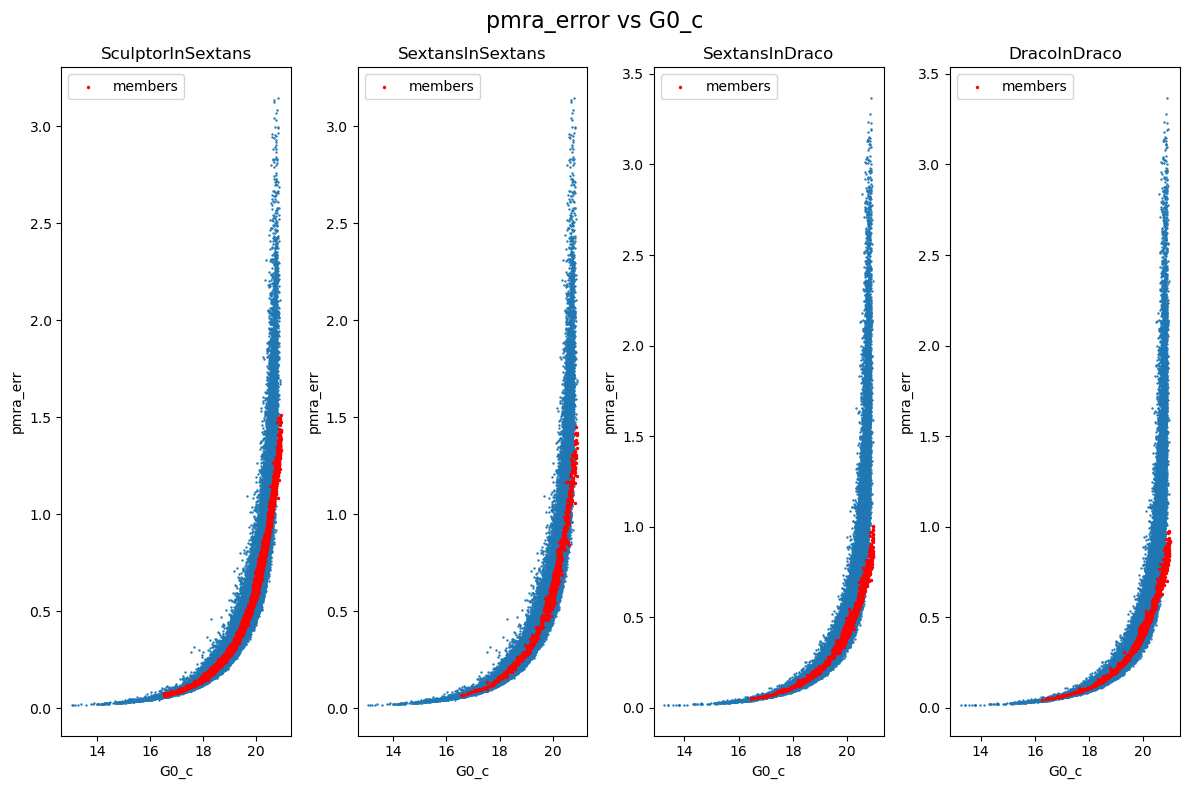

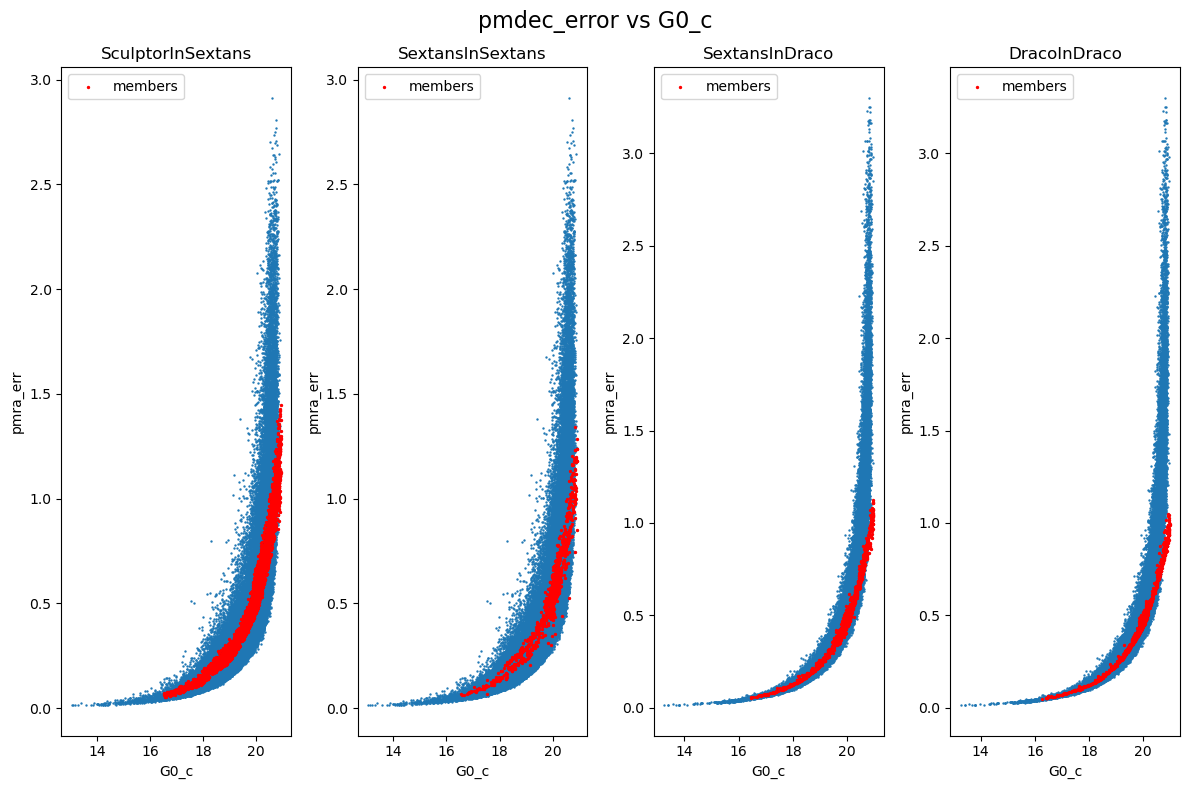

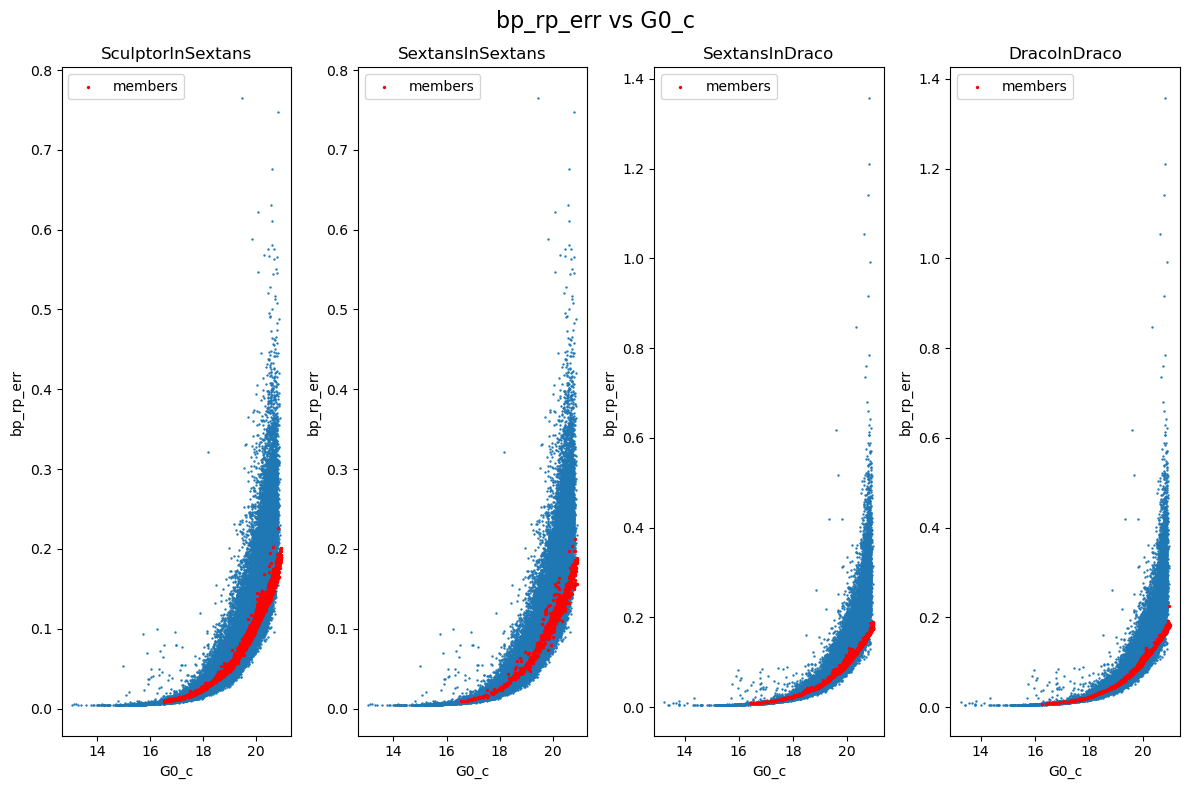

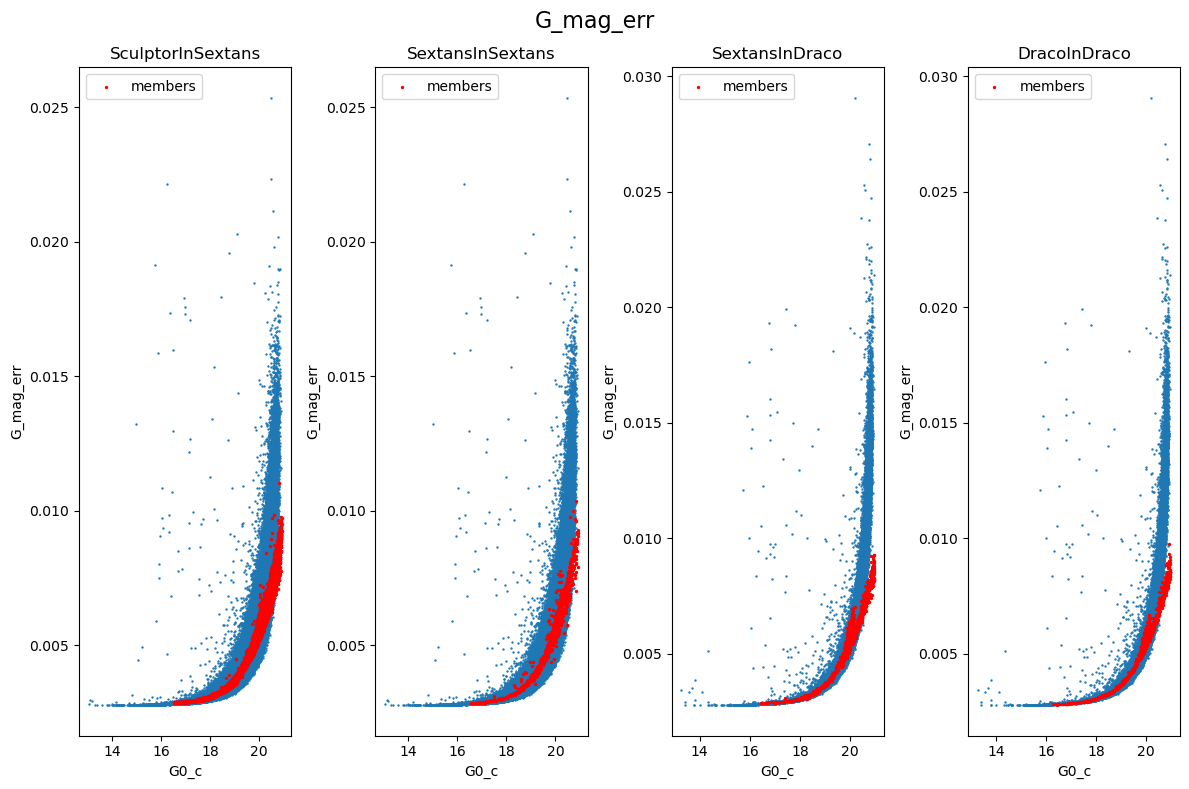

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(12, 8), dpi=100)
fig.suptitle('pmra_error vs G0_c', fontsize=16)
for i, n in enumerate(glxNames):
    # Scatter all data
    ax[i].scatter(dfs[n]['data']['G0_c'], dfs[n]['data']['pmra_error'], s=0.5)
    # Highlight members
    ax[i].scatter(
        dfs[n]['data'].loc[dfs[n]['members'], 'G0_c'],
        dfs[n]['data'].loc[dfs[n]['members'], 'pmra_error'],
        s=2, color='red', label='members'
    )
    ax[i].set_xlabel('G0_c')
    ax[i].set_ylabel('pmra_err')
    ax[i].set_title(f'{n}')
    ax[i].legend()
plt.tight_layout()


fig, ax = plt.subplots(1, 4, figsize=(12, 8), dpi=100)
fig.suptitle('pmdec_error vs G0_c', fontsize=16)
for i,n in enumerate(glxNames):
    # Scatter all data
    ax[i].scatter(dfs[n]['data']['G0_c'], dfs[n]['data']['pmdec_error'], s=0.5)
    # Highlight members
    ax[i].scatter(
        dfs[n]['data'].loc[dfs[n]['members'], 'G0_c'],
        dfs[n]['data'].loc[dfs[n]['members'], 'pmdec_error'],
        s=2, color='red', label='members'
    )
    ax[i].set_xlabel('G0_c')
    ax[i].set_ylabel('pmra_err')
    ax[i].set_title(f'{n}')
    ax[i].legend()
plt.tight_layout()

fig, ax = plt.subplots(1, 4, figsize=(12, 8), dpi=100)
fig.suptitle('bp_rp_err vs G0_c', fontsize=16)
for i,n in enumerate(glxNames):
    dfs[n]['data']['bp_rp_err'] = np.sqrt((dfs[n]['data']['phot_bp_mean_mag_err'].values)**2. + (dfs[n]['data']['phot_rp_mean_mag_err'].values)**2.)
    # Scatter all data
    ax[i].scatter(dfs[n]['data']['G0_c'], dfs[n]['data']['bp_rp_err'], s=0.5)
    # Highlight members
    ax[i].scatter(
        dfs[n]['data'].loc[dfs[n]['members'], 'G0_c'],
        dfs[n]['data'].loc[dfs[n]['members'], 'bp_rp_err'],
        s=2, color='red', label='members'
    )
    ax[i].set_xlabel('G0_c')
    ax[i].set_ylabel('bp_rp_err')
    ax[i].set_title(f'{n}')
    ax[i].legend()
plt.tight_layout()

fig, ax = plt.subplots(1, 4, figsize=(12, 8), dpi=100)
fig.suptitle('G_mag_err', fontsize=16)
for i,n in enumerate(glxNames):
    # Scatter all data
    ax[i].scatter(dfs[n]['data']['G0_c'], dfs[n]['data']['phot_g_mean_mag_err'], s=0.5)
    # Highlight members
    ax[i].scatter(
        dfs[n]['data'].loc[dfs[n]['members'], 'G0_c'],
        dfs[n]['data'].loc[dfs[n]['members'], 'phot_g_mean_mag_err'],
        s=2, color='red', label='members'
    )
    ax[i].set_xlabel('G0_c')
    ax[i].set_ylabel('G_mag_err')
    ax[i].set_title(f'{n}')
    ax[i].legend()
plt.tight_layout()
